## Composite Analysis- Monthly averaged preipitation data over Africa with AMO (Atlantic Multi-Decadal Oscillation) Index

In [1]:
# import all necessary packages
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
from clim680_function import xyticks

In [2]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")


In [3]:
#Climate index of choice: Atlantic Multidecadal Oscillation (AMO)
path='/shared/ccsm4/kpegion/obs2/CLIM_INDICES/'
file='amon.us.data'
index_name='amo'

df=pd.read_table(path+file,skiprows=1,
                 header=None,delim_whitespace=True,
                 index_col=0,parse_dates=True,na_values=['-99.99','-99.990'])
df.drop(df.tail(4).index,inplace=True)


In [4]:
start_date=str(df.index[0])+'-'+str(df.columns[0])+'-01'
end_date=str(df.index[-1])+'-'+str(df.columns[-1])+'-01'
print(start_date)

1948-1-01


In [5]:
dates=pd.date_range(start=start_date,end=end_date,freq='MS')
dates

DatetimeIndex(['1948-01-01', '1948-02-01', '1948-03-01', '1948-04-01',
               '1948-05-01', '1948-06-01', '1948-07-01', '1948-08-01',
               '1948-09-01', '1948-10-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', length=876, freq='MS')

In [6]:
clim_index=df.T.unstack().values
ds_index=xr.DataArray(clim_index,
                      coords={'time':dates},
                              dims=['time'])        
ds_index=ds_index.to_dataset(name='amo')
ds_index

<xarray.Dataset>
Dimensions:  (time: 876)
Coordinates:
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2020-12-01
Data variables:
    amo      (time) object '-0.017' '-0.029' '0.026' '-0.072' ... nan nan nan

### Slice array to be consistent with precip data

<xarray.Dataset>
Dimensions:  (time: 501)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-09-01
Data variables:
    amo      (time) object '-0.197' '-0.156' '-0.233' ... '0.354' 0.438 0.309
<xarray.DataArray 'amo' (time: 501)>
array([-0.197, -0.156, -0.233, -0.242, -0.122, -0.046, -0.099, -0.119,
       -0.114, -0.092, -0.089, -0.064, -0.006, -0.082, -0.143, -0.005,
        0.125,  0.105,  0.046,  0.019, -0.012, -0.065, -0.201, -0.253,
       -0.181, -0.18 ,  0.002, -0.094, -0.083, -0.061, -0.094, -0.114,
       -0.035, -0.186, -0.136, -0.006, -0.08 , -0.078, -0.08 , -0.182,
       -0.191, -0.183, -0.228, -0.308, -0.307, -0.37 , -0.416, -0.379,
       -0.297, -0.103,  0.082,  0.06 , -0.047, -0.053, -0.014, -0.157,
       -0.215, -0.195, -0.157, -0.002, -0.106, -0.087, -0.124, -0.157,
       -0.165, -0.324, -0.265, -0.225, -0.208, -0.343, -0.424, -0.317,
       -0.354, -0.329, -0.356, -0.4  , -0.337, -0.128, -0.153, -0.281,
       -0.247, -0.245, -0.295, -

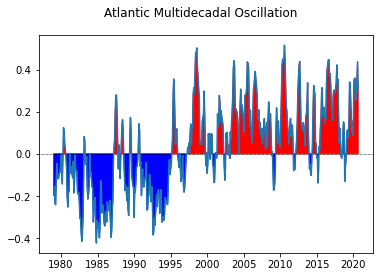

In [7]:
sliced_amo=ds_index.sel(time=slice(ds_index['time'][372],ds_index['time'][-4]))
print(sliced_amo)
#Warm AMO- above 0
#Cold AMO-below 0
amo_values = sliced_amo.amo
#print(nao_values)
amo_float = amo_values.astype(float)
print(amo_float)
warm_amo=amo_float.where(amo_float>0.0)
cold_amo = amo_float.where(amo_float<0.0)
plt.fill_between(amo_float['time'],0,warm_amo,color='red')
plt.fill_between(amo_float['time'],cold_amo, 0,color='blue')
plt.axhline(0,color='black',linewidth=0.5,linestyle='dotted')
plt.axhline(0,color='black',linewidth=0.5,linestyle='dotted')
plt.plot(amo_float['time'],amo_float)
plt.suptitle('Atlantic Multidecadal Oscillation')
plt.savefig('/homes/areed29/CLIM680_Fall2021/final_project/figures/AMO_defined')

In [8]:
# Counts the number of months with Warm and Cold AMO
counts=[warm_amo.count(dim='time').values,
        cold_amo.count(dim='time').values]
print(counts)

[array(275), array(224)]


## Now, load in the precip dataset from ERA5

In [9]:
f= '/scratch/areed29/ERA5data/*.nc' #loads in Netcdf ERA5data
DS1 = xr.open_mfdataset(f) #opens the file
dataset =DS1.mean(dim='expver')
data_lat= DS1.latitude #latitudes
data_lon= DS1.longitude #longitudes
precip = dataset.tp
print(precip)

<xarray.DataArray 'tp' (time: 513, latitude: 401, longitude: 241)>
dask.array<mean_agg-aggregate, shape=(513, 401, 241), dtype=float32, chunksize=(513, 401, 241), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... -49.5 -49.75 -50.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-09-01


### Select relevant precip values to match with AMO data

In [10]:
precip=precip.sel(time=slice(ds_index['time'][0],ds_index['time'][-4]))
precip

<xarray.DataArray 'tp' (time: 501, latitude: 401, longitude: 241)>
dask.array<getitem, shape=(501, 401, 241), dtype=float32, chunksize=(501, 401, 241), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... -49.5 -49.75 -50.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-09-01

### Mask out only land values for data, then calculate the climatology

In [11]:
ds_mean = DS1.mean('expver')
mask = ds_mean.lsm #loads in land-sea mask
land_ds = precip.where(mask>0.5)
ds_climo = land_ds.groupby('time.month').mean()
#Now calculate land anomalies
ds_anoms = land_ds.groupby('time.month')-ds_climo
print(ds_anoms)

<xarray.DataArray 'tp' (time: 501, latitude: 401, longitude: 241)>
dask.array<getitem, shape=(501, 401, 241), dtype=float32, chunksize=(1, 401, 241), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-09-01
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... -49.5 -49.75 -50.0
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 11 12 1 2 3 4 5 6 7 8 9


### Normalize the precip anomalies

In [12]:
ds_anoms_std = ds_anoms.std()
ds_anoms_norm =ds_anoms/ds_anoms_std
print(ds_anoms_norm)

<xarray.DataArray 'tp' (time: 501, latitude: 401, longitude: 241)>
dask.array<truediv, shape=(501, 401, 241), dtype=float32, chunksize=(1, 401, 241), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-09-01
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... -49.5 -49.75 -50.0
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 11 12 1 2 3 4 5 6 7 8 9


### Next, select the dates that match Warm and cold AMO

In [13]:
warm_amo_precip = ds_anoms_norm.sel(time =warm_amo.dropna(dim='time')['time']).mean(dim='time')
cold_amo_precip= ds_anoms_norm.sel(time=cold_amo.dropna(dim='time')['time']).mean(dim='time')

comp_precip = [warm_amo_precip,cold_amo_precip]
print(comp_precip)
print(np.nanmin(warm_amo_precip),np.nanmax(warm_amo_precip))
print(np.nanmin(cold_amo_precip), np.nanmax(cold_amo_precip))

[<xarray.DataArray 'tp' (latitude: 401, longitude: 241)>
dask.array<mean_agg-aggregate, shape=(401, 241), dtype=float32, chunksize=(401, 241), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... -49.5 -49.75 -50.0, <xarray.DataArray 'tp' (latitude: 401, longitude: 241)>
dask.array<mean_agg-aggregate, shape=(401, 241), dtype=float32, chunksize=(401, 241), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... -49.5 -49.75 -50.0]
-1.1428638 0.6948713
-0.8429654 1.3557527


Text(0.5, 0.98, 'Composite Precipitation Anomalies during AMO')

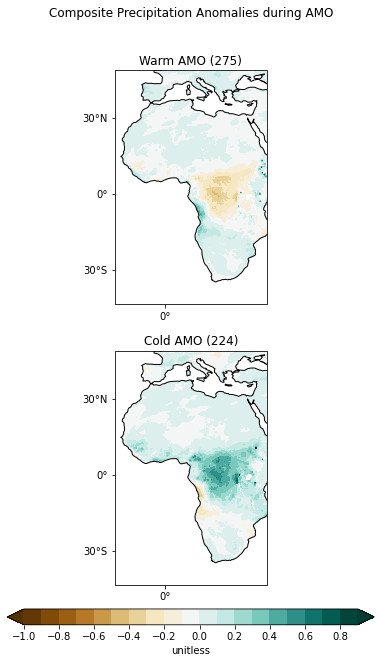

In [33]:
labels=['Warm AMO','Cold AMO']
clevs=np.arange(-1,1,0.1)

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the phases and plot
for i,amo in enumerate(comp_precip):

        # Select the season
        data=comp_precip[i]

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=comp_precip[i]['longitude'])

        # Contour plot
        cs=axs[i].contourf(lons,comp_precip[i]['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='BrBG',extend='both')

       # Longitude and latitude labels
        xyticks(axs[i],lons,comp_precip[i]['latitude'])
        #Set extent for the plots
        axs[i].set_extent([-20,40,-40,45])
        
        # Title each subplot with the name of the composite
        axs[i].set_title(labels[i]+' ('+str(counts[i])+')')

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='unitless')

# Add a big title at the top
plt.suptitle('Composite Precipitation Anomalies during AMO')

### Selecting a point to create a scatter point of AMO index vs. monthly averaged normalized Precipitation Anomalies

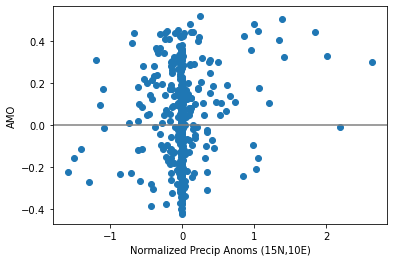

In [16]:
pt=ds_anoms_norm.sel(latitude=15,longitude=10,method='nearest') #the Sahel region
plt.scatter(pt,amo_float)
plt.xlabel('Normalized Precip Anoms (15N,10E)')
plt.ylabel('AMO')

plt.axhline(0,color='gray')

### Next, calculate the difference between the warm AMO precip composite and cold AMO precip composite

In [17]:
diff_precip=[warm_amo_precip- cold_amo_precip] 
print(diff_precip)

[<xarray.DataArray 'tp' (latitude: 401, longitude: 241)>
dask.array<sub, shape=(401, 241), dtype=float32, chunksize=(401, 241), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... -49.5 -49.75 -50.0]


Text(0.5, 1.0, 'Composite Precipitation Differences during AMO Events')

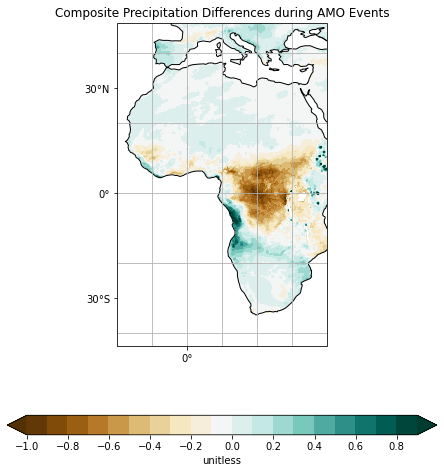

In [19]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))
clevs = np.arange(-1,1,0.1)
# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
data=diff_precip[0]
data, lons = add_cyclic_point(data, coord=diff_precip[0]['longitude'])


# # Make a filled contour plot
cs=ax.contourf(lons, diff_precip[0]['latitude'], data,clevs,
            transform = ccrs.PlateCarree(),cmap='BrBG',extend='both')
xyticks(ax,lons,diff_precip[0]['latitude'])
ax.set_extent([-20,40,-40,45])
# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='unitless')

# Add title
plt.title('Composite Precipitation Differences during AMO Events')


### Calculate Significance Using the built-in Stats Function

In [20]:
p=0.05 # Pick a level of significance 

In [22]:
from scipy.stats import ttest_ind

warm_amo_precip_vals = ds_anoms_norm.sel(time =warm_amo.dropna(dim='time')['time'])
cold_amo_precip_vals= ds_anoms_norm.sel(time=cold_amo.dropna(dim='time')['time'])


tstat,pval=ttest_ind(warm_amo_precip_vals, cold_amo_precip_vals,equal_var = False)


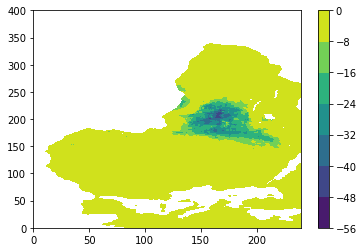

In [23]:
plt.contourf(np.log(pval))
plt.colorbar()

### Next, make a mask where the value is significant

In [24]:
mask_diff=diff_precip[0].where(pval<p)
mask_diff

<xarray.DataArray 'tp' (latitude: 401, longitude: 241)>
dask.array<where, shape=(401, 241), dtype=float32, chunksize=(401, 241), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... -49.5 -49.75 -50.0

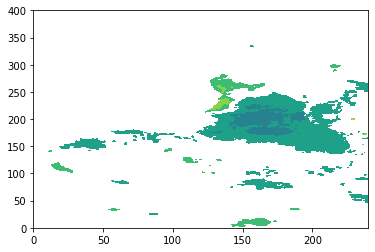

In [25]:
plt.contourf(mask_diff)

### Finally, plot the differences between composites, and also mark where it is significant

Text(0.5, 0.98, 'Composite Precipitation Differences Warm AMO-Cold AMO')

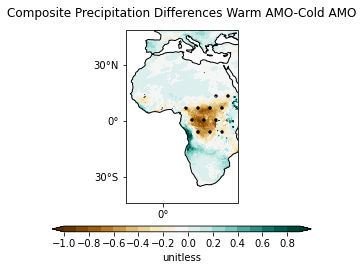

In [29]:
labels=['Warm AMO-Cold AMO']
clevs=np.arange(-1,1,0.1)
hatch_levs=[0]

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()})


data=diff_precip[0]

# Add the cyclic point
data,lons=add_cyclic_point(data,coord=diff_precip[0]['longitude'])
mask_data,lons=add_cyclic_point(mask_diff,coord=diff_precip[0]['longitude'])

# Contour plot
cs=axs.contourf(lons,diff_precip[0]['latitude'],data,clevs,
                    transform = ccrs.PlateCarree(),
                    cmap='BrBG',extend='both')
xyticks(axs,lons,diff_precip[0]['latitude'])
axs.contourf(lons,diff_precip[0]['latitude'],mask_data,[0,1],
              transform = ccrs.PlateCarree(),colors='None',
             hatches=['.',''],extend='both',alpha=0)

axs.set_extent([-20,40,-40,45])
# Draw the coastines for each subplot
axs.coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.3, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='unitless')

# Add a big title at the top
plt.suptitle('Composite Precipitation Differences Warm AMO-Cold AMO')

